<h1><center>YanP_02</center></h1>


<h3 align="center">Oct 22, 2022</h3> 

0.1  Student: Yan, Puwentao (V00031753)
## 1 Problem 1

In [18]:
# installing basic python3 library
!pip freeze
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install sklearn
!pip3 install keras

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.

In [19]:
import numpy as np
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score,StratifiedKFold

1. Hard

In [20]:
# load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_index = np.where((train_y == 1 ) | (train_y == 7))
test_index = np.where((test_y == 1) | (test_y == 7))
train_X, train_y = train_X[train_index].reshape(13007, 784), train_y[train_index]
test_X, test_y = test_X[test_index].reshape(2163, 784), test_y[test_index]
np.random.seed(1337)

Hard-margin SVM value of C: inf, training score :1.000000 , Test Score: 0.991678 



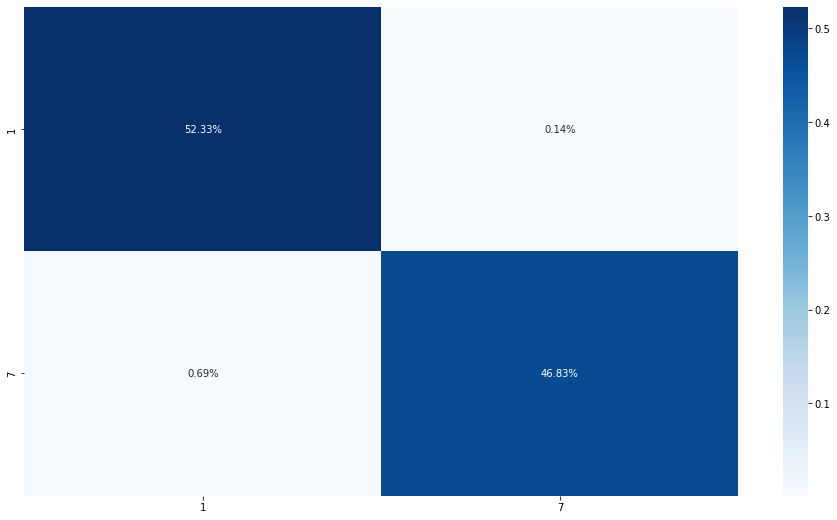

In [21]:
model = SVC(kernel='linear', C=float("inf")) # when C is inf, ζ = 0 ==> hard-margin SVM
model.fit(train_X,train_y)
scoretrain = model.score(train_X,train_y)
scoretest  = model.score(test_X,test_y)
print("Hard-margin SVM value of C: inf, training score :{:2f} , Test Score: {:2f} \n".format(scoretrain, scoretest))

# create confusion matrix of training and test errors
predicts = model.predict(test_X)
confusion_matr = confusion_matrix(test_y, predicts)
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr/np.sum(confusion_matr), fmt='.2%', cmap="Blues", annot=True, xticklabels=[1,7], yticklabels=[1,7]);
plt.savefig("conf matrix")

Summary:

It can be done and the result is very good. The accuracy of training set is 1 and The accuracy of testing set is 0.991678.

2. Soft

In [22]:
# Set model to obtain the Cross Validation Score
model = SVC(kernel='linear', C=20)
model.fit(train_X,train_y)
scores = cross_val_score(model, train_X, train_y, cv=5)
strat_scores = cross_val_score(model, train_X, train_y, cv=StratifiedKFold(5,random_state=10,shuffle=True))
print("The Cross Validation Score :"+str(scores))

The Cross Validation Score :[0.99538816 0.99385088 0.99423299 0.99384852 0.99423299]


Soft-margin SVM value of C: 0.9943107082624463, training score :1.000000 , Test Score: 0.991678 



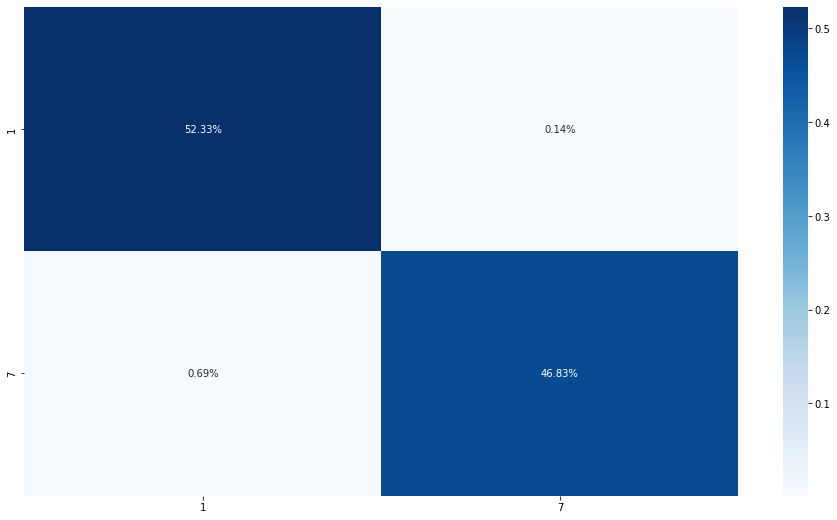

In [23]:
# build model based on the Cross Validation Score
model = SVC(kernel='linear', C=scores.mean())
model.fit(train_X,train_y)
scoretrain = model.score(train_X,train_y)
scoretest  = model.score(test_X,test_y)
print("Soft-margin SVM value of C: {}, training score :{:2f} , Test Score: {:2f} \n".format(scores.mean(), scoretrain, scoretest))

# create confusion matrix of training and test errors
predicts = model.predict(test_X)
confusion_matr = confusion_matrix(test_y, predicts)
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr/np.sum(confusion_matr), fmt='.2%', cmap="Blues", annot=True, xticklabels=[1,7], yticklabels=[1,7]);
plt.savefig("conf matrix")

Summary:

Yes, I did achieve better results. Soft-margin SVM with the best value of C has higher accuracy than the hard-margin SVM.

3. Kernel

3.1 (a)

In [24]:
# test different values of degree
for i in [1, 3, 5, 7, 9]:
  model = SVC(kernel='poly', degree=i, C=scores.mean())
  model.fit(train_X,train_y)
  scoretrain = model.score(train_X,train_y)
  scoretest  = model.score(test_X,test_y)
  print("SVM value of C: {}, training score :{:2f} , Test Score: {:2f} \n".format(scores.mean(), scoretrain, scoretest))

SVM value of C: 0.9943107082624463, training score :0.996233 , Test Score: 0.992603 

SVM value of C: 0.9943107082624463, training score :0.998232 , Test Score: 0.993990 

SVM value of C: 0.9943107082624463, training score :0.995233 , Test Score: 0.987517 

SVM value of C: 0.9943107082624463, training score :0.984316 , Test Score: 0.971336 

SVM value of C: 0.9943107082624463, training score :0.968402 , Test Score: 0.954693 



3.2 (b)

In [25]:
# Gaussian kernel
model = SVC(kernel='rbf', C=scores.mean())
model.fit(train_X,train_y)
scoretrain = model.score(train_X,train_y)
scoretest  = model.score(test_X,test_y)
print("SVM value of C: {}, training score :{:2f} , Test Score: {:2f} \n".format(scores.mean(), scoretrain, scoretest))

SVM value of C: 0.9943107082624463, training score :0.997924 , Test Score: 0.997226 



3.3 (c)

In [26]:
# linear kernel
model = SVC(kernel='linear', C=scores.mean())
model.fit(train_X,train_y)
scoretrain = model.score(train_X,train_y)
scoretest  = model.score(test_X,test_y)
print("SVM value of C: {}, training score :{:2f} , Test Score: {:2f} \n".format(scores.mean(), scoretrain, scoretest))

SVM value of C: 0.9943107082624463, training score :1.000000 , Test Score: 0.991678 



Summary:

Gaussian kernel with the best soft-margin model is the best. The accuracy of training set is 0.997924 and The accuracy of testing set is 0.997226.